### Recover the information about the radius of gyration of a given simulation 

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import re
import os

In [26]:
"""
loads atom positions from all LAMMPS files in given directory  
input directory: path of directory e.g. run3-100_dumplin (string)
output: positions of all atoms at different times (numpy array) 
"""
def dir_to_trajs(directory):
    a = []
    # iterate over files in
    # that directory
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file: 
        if os.path.isfile(f):
            a.append(np.loadtxt(f, skiprows=9, usecols=(1,2,3)))
    
    return np.asarray(a[-round(len(a)/2):])#[a[-125],a[-1]]

In [27]:
"""Compute the radius of gyration of a single trajectory"""
def GetSingleRadius(state):
   n = state.shape[0]
   d_sq = np.asarray([np.linalg.norm(point)**2 for point in state])  
   return np.sqrt(np.mean(d_sq))


In [28]:
"""Compute radii of gyration during all the simulation"""
def GetAllRadii(directory):
   trajs = dir_to_trajs(directory)
   radii = [GetSingleRadius(trajs[t_step]) for t_step in range(1,trajs.shape[0])]
   return radii
 

In [29]:
"""Plot radius of gyration through the simulation"""
def PlotAllRadii(directory):
   radii = GetAllRadii(directory)
   plt.plot(radii)

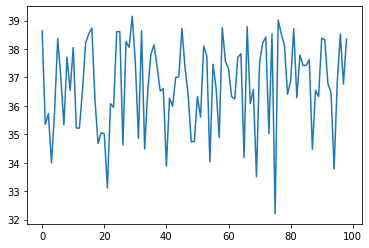

In [32]:
directory = '../run2-1000/dumplin_no_init_relax'
PlotAllRadii(directory)


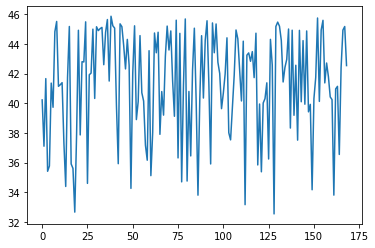

In [33]:
directory = '../run2-1000/dumplin'
PlotAllRadii(directory)


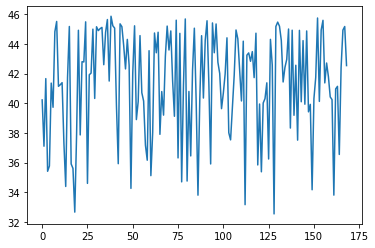

In [36]:
directory = '../run2-1000/dumplin_cluster/dumplin_A20_K90_1'
PlotAllRadii(directory)

In [41]:
"""Plot radius of gyration through simulations in the list(of strings)"""
def PlotAllSimRadii(sim_list):
   for directory in sim_list:
      sim_name = directory[19:]
      radii = GetAllRadii(directory)
      plt.plot(radii,label=sim_name)
      plt.legend()

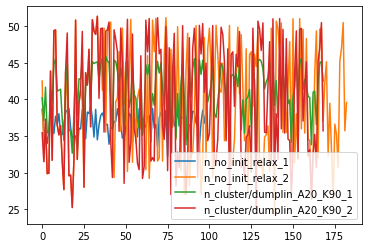

In [44]:
simulations = ['../run2-1000/dumplin_no_init_relax_1','../run2-1000/dumplin_no_init_relax_2','../run2-1000/dumplin_cluster/dumplin_A20_K90_1','../run2-1000/dumplin_cluster/dumplin_A20_K90_2']
PlotAllSimRadii(simulations)